In [25]:
import requests
from io import BytesIO
from PIL import Image
import matplotlib.pyplot as plt

from astropy.io import fits

# Utilize search API to grab image data products
Below should be an explanation for how the data was identified

In [41]:

#### request that grabs rover2020 orbital map img
response = requests.get('https://pds.nasa.gov/api/search/1/products?q=((pds:Identification_Area.pds:product_class eq "Product_Observational") and (ops:Harvest_Info.ops:node_name eq "PDS_GEO") and (pds:Array_2D_Image.pds:axes eq "2") and (pds:Primary_Result_Summary.pds:processing_level eq "Derived") )&start=0&limit=3000')

#pds:Array_2DImage.pds:axes eq "2"
#pds:Data_Processing_Level - specify not raw


#(pds:Science_Facets.pds:wavelength_range eq "Visible")
#### Venus flyby images
# response = requests.get('https://pds.nasa.gov/api/search/1/products?q=((pds:Science_Facets.pds:wavelength_range eq "Visible") and not (ops:Harvest_Info.ops:node_name eq "PDS_SBN"))&start=0&limit=3000')


#### Orex imaging
# response = requests.get('https://pds.nasa.gov/api/search/1/products/urn:nasa:pds:orex.gbo.ast-bennu.lightcurves-images:data::1.0/members')

resp_data = response.json()['data']


counter = -1
urls = []
for prod in resp_data:
    urls.append([prod['properties']['ops:Data_File_Info.ops:file_ref'][0]])
    # if '.fits' in prod['properties']['ops:Data_File_Info.ops:file_ref'][0]:
    #     urls.append([prod['properties']['ops:Data_File_Info.ops:file_ref'][0]])

print('debug')


debug


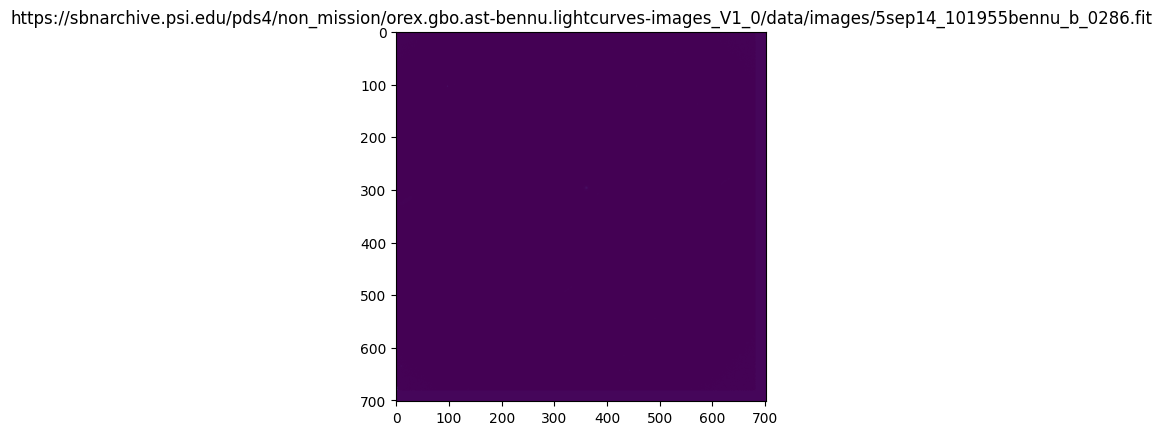

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

KeyboardInterrupt: 

In [36]:
# import

def display_image_from_url(urls):
    # response.raise_for_status()
    if "img" in urls[0]:
        # response = requests.get(url)
        # data = response.content
        image = Image.open(BytesIO(response.content))

        imgIO = BytesIO()
        image.save(imgIO, "IMG")
        imgIO.seek(0)
        imgbyte = imgIO.read()
        # image.show()
    else:
        fig, ax = plt.subplots()

        for url in urls:
            response = requests.get(url[0])
            hdu_list = fits.open(BytesIO(response.content))
            data = hdu_list[0].data
            # data = response.content

            ax.imshow(data)
            ax.set_title(url[0])
            plt.draw()
            plt.pause(1)
            ax.clear()
        plt.show()

    # hdu_list.close()

ind = 2800
display_image_from_url(urls)
# print(urls[ind])

#use wget to install the large image files - brew install wget

#https://pds.nasa.gov/api/search/1/products/urn:nasa:pds:orex.gbo.ast-bennu.lightcurves-images:data::1.0/members
#"https://sbnarchive.psi.edu/pds4/non_mission/orex.gbo.ast-bennu.lightcurves-images_V1_0/data/images/5sep14_101955bennu_w_0214.fit"
print('debug')

In [22]:
urls[:]

[['https://pds-geosciences.wustl.edu/messenger/urn-nasa-pds-izenberg_pdart14_meap/data_tnmap/thermal_neutron_map.img'],
 ['https://pds-geosciences.wustl.edu/m2020/urn-nasa-pds-mars2020_rover_places/data_maps/m20_orbital_dem.img'],
 ['https://pds-geosciences.wustl.edu/m2020/urn-nasa-pds-mars2020_rover_places/data_maps/m20_orbital_map.img']]

In [ ]:
import os
from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename


if not os.access('.spice_kernels',os.F_OK):
        os.mkdir('.img')

    kernel_dir = os.path.join(".img")
    os.makedirs(kernel_dir, exist_ok=True)

    file_path = os.path.join(kernel_dir, os.path.basename(url))
    open(file_path, "wb").write(response.content)
    r = requests.get(url, allow_redirects=True)

        plt.style.use(astropy_mpl_style)
    image_file = get_pkg_data_filename('tutorials/FITS-images/HorseHead.fits')

    # hdul = fits.open(io.BytesIO(response.content))

    img_data = fits.getdata(image_file, ext = 0)

    # data = hdul[0].data
    plt.figure()
    plt.imshow(data, cmap='gray', origin='lower')
    plt.colorbar()
    plt.show()
